In [3]:
%matplotlib inline
!pip install contextily
!pip install geopandas
import pandas as pd
import geopandas
import contextily as ctx
from shapely.geometry import Point
import xyzservices.providers as xyz
from google.colab import drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
quartieri_milano = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/ds964_nil_wm.zip')
quartieri_milano

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

In [6]:
parchi = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Parchi_regionali_e_nazionali_polygon.zip')
parchi

FID  ...                                           geometry
0     5  ...  POLYGON ((587577.037 5107497.548, 587615.036 5...
1     6  ...  POLYGON ((586196.195 5100871.221, 586351.566 5...
2     7  ...  POLYGON ((486537.216 5078441.081, 486530.341 5...
3     8  ...  POLYGON ((617860.123 5053114.432, 617863.431 5...
4     1  ...  POLYGON ((584084.298 5161019.100, 583763.056 5...
5     2  ...  POLYGON ((611429.112 5154022.734, 612080.475 5...
6     3  ...  POLYGON ((584084.298 5161019.100, 584083.048 5...
7     4  ...  POLYGON ((617719.939 5125721.072, 617744.313 5...
8     9  ...  POLYGON ((533258.682 5067541.607, 533248.433 5...
9    15  ...  POLYGON ((476666.268 5067282.167, 476899.067 5...
10   11  ...  POLYGON ((503128.548 5073530.075, 503147.548 5...
11   10  ...  POLYGON ((530035.026 5077348.997, 530099.399 5...
12   20  ...  POLYGON ((566862.701 5044980.915, 566850.701 5...
13   16  ...  POLYGON ((551172.408 5063194.271, 551171.818 5...
14   17  ...  POLYGON ((530460.139 5059979.758, 530448.139 5...
15   12  ...  POLYGON ((519023.300 5071249.811, 519020.695 5...
16   13  ...  POLYGON ((508880.762 5069982.391, 508899.778 5...
17   14  ...  POLYGON ((492571.508 5069463.220, 492567.133 5...
18   19  ...  POLYGON ((507798.216 5051185.214, 507708.842 5...
19   18  ...  POLYGON ((557596.061 5048270.880, 557609.061 5...
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...
22   23  ...  POLYGON ((540167.544 5038793.618, 540195.043 5...
23   24  ...  POLYGON ((632059.361 5023580.221, 631992.362 5...
24   25  ...  POLYGON ((507743.475 5029863.193, 507763.882 5...
25   26  ...  POLYGON ((597132.825 5006159.060, 597136.825 5...

[26 rows x 11 columns]

In [7]:
com = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/Com01012021_g')
reg = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/Reg01012021_g')

In [27]:
parchi.to_crs(epsg=32632)

FID  ...                                           geometry
0     5  ...  POLYGON ((587577.037 5107497.548, 587615.036 5...
1     6  ...  POLYGON ((586196.195 5100871.221, 586351.566 5...
2     7  ...  POLYGON ((486537.216 5078441.081, 486530.341 5...
3     8  ...  POLYGON ((617860.123 5053114.432, 617863.431 5...
4     1  ...  POLYGON ((584084.298 5161019.100, 583763.056 5...
5     2  ...  POLYGON ((611429.112 5154022.734, 612080.475 5...
6     3  ...  POLYGON ((584084.298 5161019.100, 584083.048 5...
7     4  ...  POLYGON ((617719.939 5125721.072, 617744.313 5...
8     9  ...  POLYGON ((533258.682 5067541.607, 533248.433 5...
9    15  ...  POLYGON ((476666.268 5067282.167, 476899.067 5...
10   11  ...  POLYGON ((503128.548 5073530.075, 503147.548 5...
11   10  ...  POLYGON ((530035.026 5077348.997, 530099.399 5...
12   20  ...  POLYGON ((566862.701 5044980.915, 566850.701 5...
13   16  ...  POLYGON ((551172.408 5063194.271, 551171.818 5...
14   17  ...  POLYGON ((530460.139 5059979.758, 530448.139 5...
15   12  ...  POLYGON ((519023.300 5071249.811, 519020.695 5...
16   13  ...  POLYGON ((508880.762 5069982.391, 508899.778 5...
17   14  ...  POLYGON ((492571.508 5069463.220, 492567.133 5...
18   19  ...  POLYGON ((507798.216 5051185.214, 507708.842 5...
19   18  ...  POLYGON ((557596.061 5048270.880, 557609.061 5...
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...
22   23  ...  POLYGON ((540167.544 5038793.618, 540195.043 5...
23   24  ...  POLYGON ((632059.361 5023580.221, 631992.362 5...
24   25  ...  POLYGON ((507743.475 5029863.193, 507763.882 5...
25   26  ...  POLYGON ((597132.825 5006159.060, 597136.825 5...

[26 rows x 11 columns]

1. visualizzi i parchi di Milano e i comuni che vi fanno parte (vedi immagine allegata)

In [9]:
milano= com[com.COMUNE == 'Milano']
milano

COD_RIP  ...                                           geometry
1882        1  ...  POLYGON ((513714.538 5042508.056, 513985.199 5...

[1 rows x 13 columns]

In [10]:
parchi_milano = parchi[parchi.intersects(milano.geometry.squeeze())]
parchi_milano

FID  ...                                           geometry
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...

[2 rows x 11 columns]

In [11]:
comp= com[com.intersects(parchi_milano.unary_union)]
comp

COD_RIP  ...                                           geometry
1811        1  ...  POLYGON ((493446.898 5029705.643, 493602.897 5...
1812        1  ...  POLYGON ((495595.883 5032525.624, 495661.881 5...
1815        1  ...  POLYGON ((496562.280 5041533.478, 496401.277 5...
1816        1  ...  POLYGON ((511386.603 5029333.275, 511518.968 5...
1817        1  ...  POLYGON ((499326.672 5038880.244, 499885.260 5...
...       ...  ...                                                ...
7465        1  ...  POLYGON ((534210.409 5035224.602, 534551.968 5...
7484        1  ...  POLYGON ((534698.954 5033625.792, 534731.476 5...
7486        1  ...  POLYGON ((530678.622 5027337.660, 530960.619 5...
7500        1  ...  POLYGON ((529834.629 5021137.707, 530206.624 5...
7506        1  ...  POLYGON ((534164.595 5029853.641, 534184.596 5...

[88 rows x 13 columns]

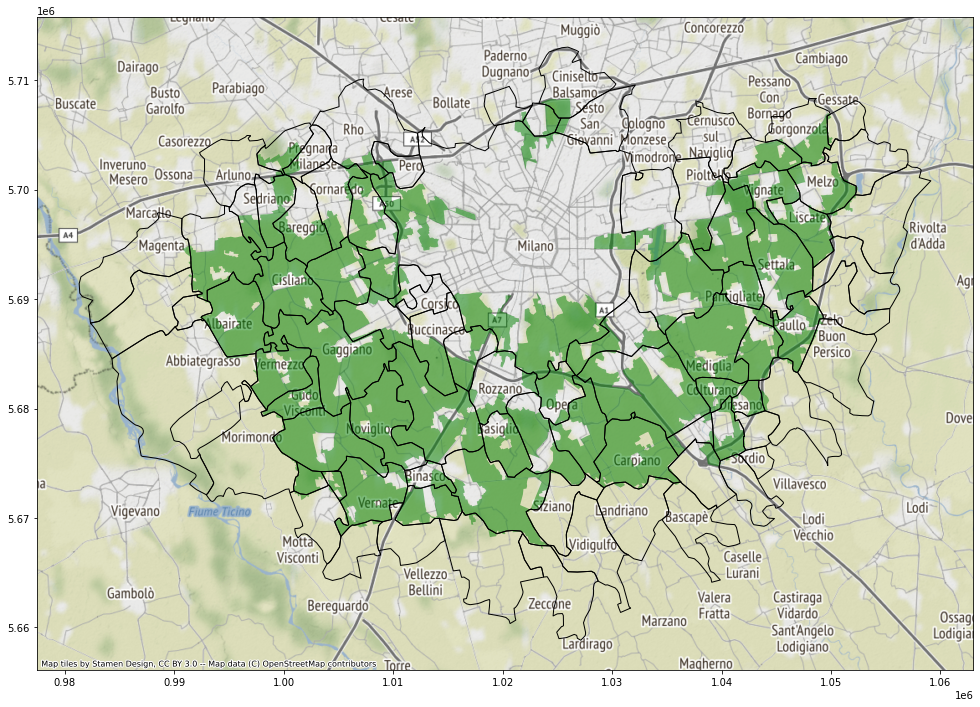

In [12]:
ax = parchi_milano.to_crs(epsg=3857).plot(figsize=(20,12), facecolor = 'green', alpha= 0.5)
comp.to_crs(epsg=3857).plot(ax=ax, facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

Visualizzare i comuni confinanti con milano


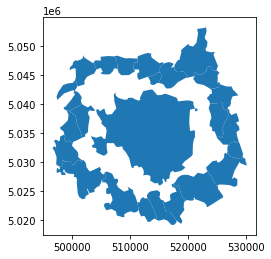

In [13]:
comconf = com[com.touches(milano.geometry.squeeze())]
conf = com[com.touches(comconf.unary_union)]
conf.plot()

visualizza il più grande comune confinante con Milano

In [14]:
bigc= comconf[comconf.Shape_Area==comconf.Shape_Area.max()]
bigc

COD_RIP  ...                                           geometry
1897        1  ...  POLYGON ((524640.471 5035256.833, 525021.665 5...

[1 rows x 13 columns]

In [15]:
smallc= comconf[comconf.Shape_Area==comconf.Shape_Area.min()]
smallc

COD_RIP  ...                                           geometry
1942        1  ...  POLYGON ((509363.172 5042554.492, 509538.293 5...

[1 rows x 13 columns]

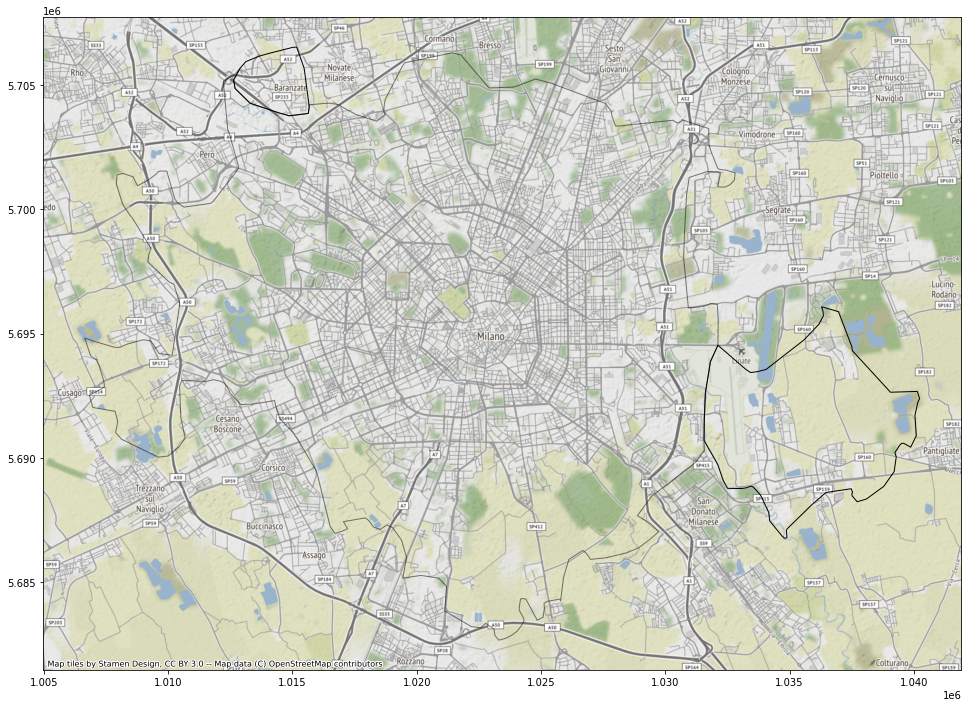

In [16]:
ax = milano.to_crs(epsg=3857).plot(figsize=(20,12), facecolor = 'none', edgecolor='k', alpha= 0.5)
bigc.to_crs(epsg=3857).plot(ax=ax, facecolor='none',edgecolor='k')
smallc.to_crs(epsg=3857).plot(ax=ax, facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

2. analogo al primo esercizio ma tracciando sulla mappa solo i quartieri di Milano attraversati da parchi (e non tutta la città)

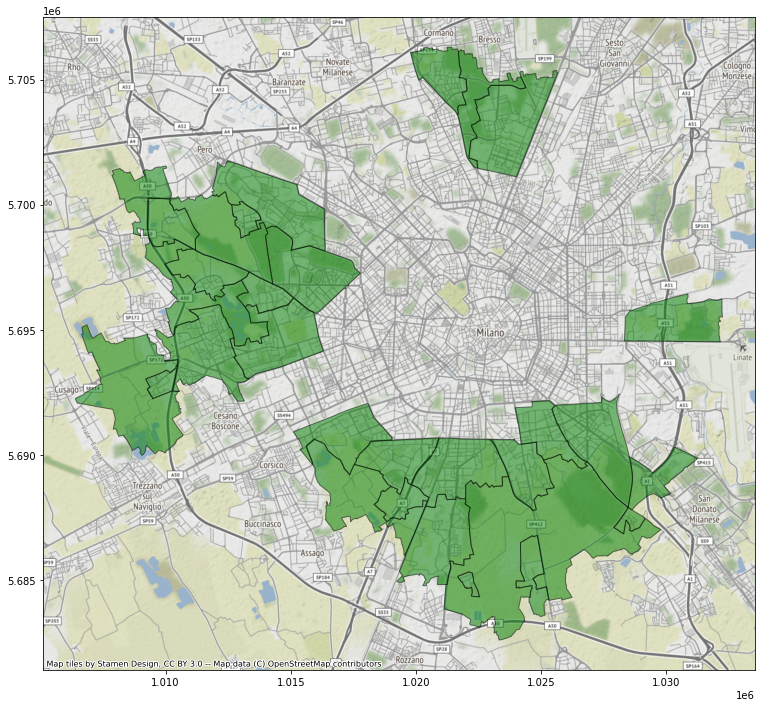

In [17]:
parchiqt= quartieri_milano[quartieri_milano.intersects(parchi.to_crs(epsg=4326).geometry.unary_union)]
ax = parchiqt.to_crs(epsg=3857).plot(figsize=(20,12), facecolor = 'green',edgecolor='k', alpha=0.5)
ctx.add_basemap(ax)


3  dato il nome di un parco, avere la mappa del parco con i comuni che lo ospitano

Inserire il nome di un parco: Parco Nord Milano


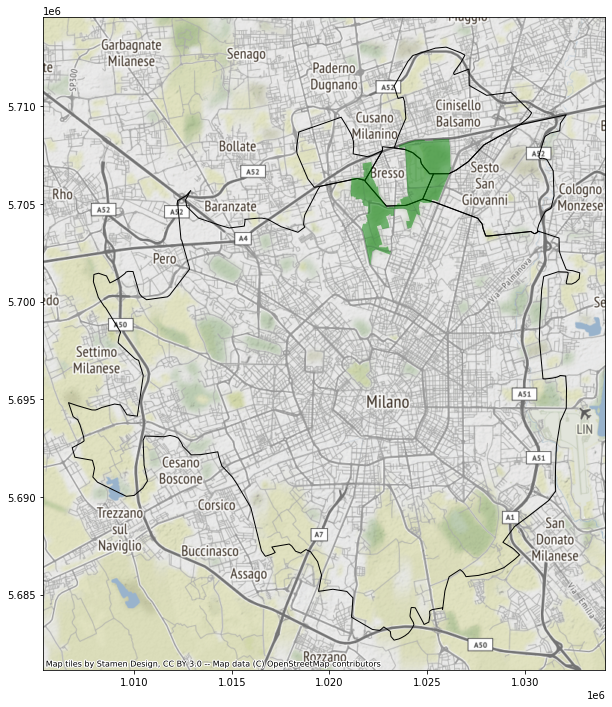

In [22]:
user = input('Inserire il nome di un parco: ')
lst = list(parchi['NOME'])
if user not in lst:
  print('Il Parco inserito non è in Lombardia')
else: 
  parco = parchi[parchi.NOME==user].to_crs(epsg=32632)
  comuni = com[com.intersects(parco.geometry.squeeze())]
  ax = comuni.to_crs(epsg=3857).plot(figsize=(20,12), facecolor='none', edgecolor='k')
  parco.to_crs(epsg=3857).plot(ax=ax, facecolor='green', alpha=0.5)
  ctx.add_basemap(ax)

4. dato il nome di un parco, avere la mappa del parco con le province che attraversa

In [21]:
pro = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/ProvCM01012021_g')
pro

COD_RIP  ...                                           geometry
0          1  ...  POLYGON ((411015.006 5049970.983, 411266.039 5...
1          1  ...  POLYGON ((438328.612 5087208.215, 439028.888 5...
2          1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...
3          1  ...  MULTIPOLYGON (((378673.492 4958865.159, 378928...
4          1  ...  POLYGON ((425041.329 4997628.309, 424948.989 4...
..       ...  ...                                                ...
102        1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...
104        3  ...  POLYGON ((884760.019 4804406.440, 885511.011 4...
105        4  ...  POLYGON ((1081237.144 4611047.023, 1081399.393...
106        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[107 rows x 13 columns]

In [26]:
pro.crs


<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Inserire il nome di un parco: Parco Valle del Lambro


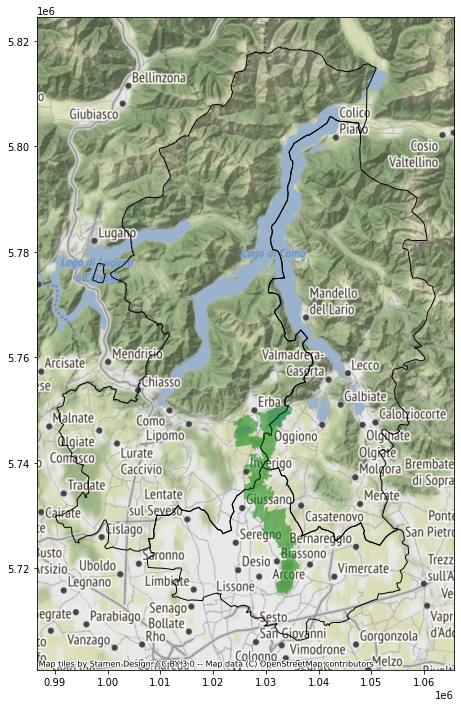

In [31]:
user = input('Inserire il nome di un parco: ')
lst = list(parchi['NOME'])
if user not in lst:
  print('Il Parco inserito non è in Lombardia')
else: 
  parco = parchi[parchi.NOME==user].to_crs(epsg=32632)
  comuni = pro[pro.intersects(parco.geometry.squeeze())]
  ax = comuni.to_crs(epsg=3857).plot(figsize=(20,12), facecolor='none', edgecolor='k')
  parco.to_crs(epsg=3857).plot(ax=ax, facecolor='green', alpha=0.5)
  ctx.add_basemap(ax)


5. dato un comune, avere i parchi che ospita (elenco e mappa)

Inserire un comune:Milano
20    Parco Nord Milano
21     Parco Sud Milano
Name: NOME, dtype: object


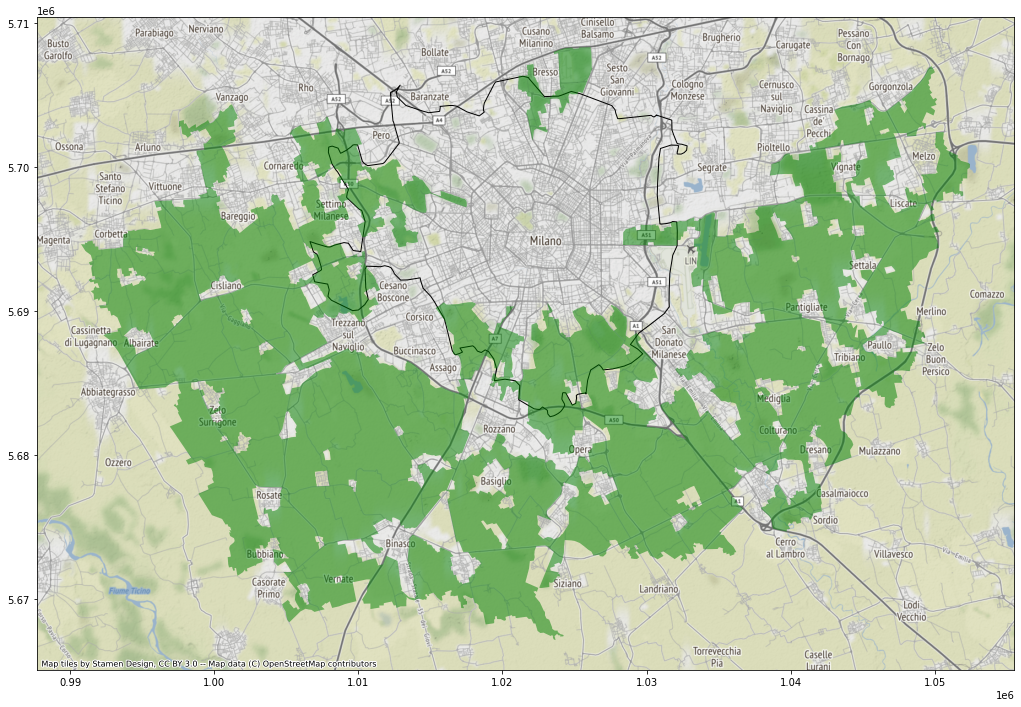

In [51]:
user = input('Inserire un comune:')
lst = list(com['COMUNE'])
if user not in lst:
  print('Il Comune inserito non è in Lombardia')
else: 
  parchiCOMUNI = parchi[parchi.intersects(com[com.COMUNE.str.contains(user)].geometry.squeeze())]
  comuni = com[com.COMUNE==user].to_crs(epsg=32632)
  parco = parchi[parchi.intersects(comuni.geometry.squeeze())]
  ax = comuni.to_crs(epsg=3857).plot(figsize=(20,12), facecolor='none', edgecolor='k')
  parco.to_crs(epsg=3857).plot(ax=ax, facecolor='green', alpha=0.5)
  print(parchiCOMUNI.NOME)
  ctx.add_basemap(ax)

6. dato il nome di una provincia, avere i parchi che ospita (elenco e mappa)

Inserire una provincia:Milano
8            Parco Adda Nord
9     Parco Valle del Ticino
18        Parco delle Groane
20         Parco Nord Milano
21          Parco Sud Milano
22            Parco Adda Sud
24          Parco Sud Milano
Name: NOME, dtype: object


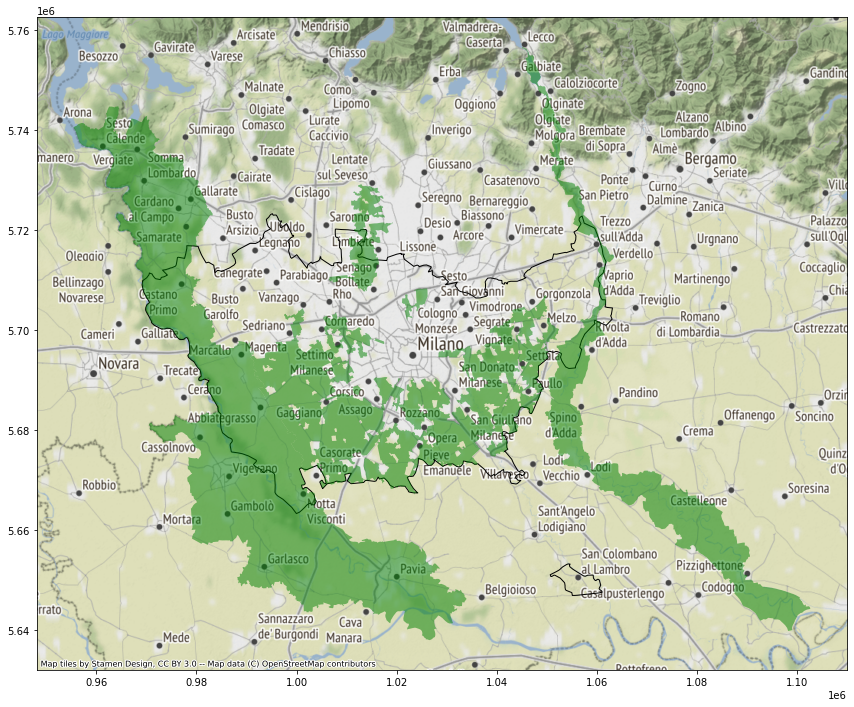

In [49]:
user = input('Inserire una provincia:')
lst = list(pro['DEN_UTS'])
if user not in lst:
  print('la regione inserita non è in Lombardia')
else: 
  parchiProvincia = parchi[parchi.intersects(pro[pro.DEN_UTS.str.contains(user)].geometry.squeeze())]
  province = pro[pro.DEN_UTS==user].to_crs(epsg=32632)
  parco = parchi[parchi.intersects(province.geometry.squeeze())]
  ax = province.to_crs(epsg=3857).plot(figsize=(20,12), facecolor='none', edgecolor='k')
  parco.to_crs(epsg=3857).plot(ax=ax, facecolor='green', alpha=0.5)
  ctx.add_basemap(ax)
  print(parchiProvincia.NOME)